Visualize trained Caffe models

First import required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/home/trevor/Documents/dev/ml/caffe/'
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
caffe.set_mode_cpu()

# edit these paths as needed
network_definition_path = '../tests/walkway_original_live_input_fixed_update_full_acts/fast_dqn.prototxt'
caffe_model_path = '../tests/walkway_original_live_input_fixed_update_full_acts/models/dqn_iter_100000.caffemodel'

net = caffe.Net(network_definition_path,
                caffe_model_path,
                caffe.TEST)

Let's look at the network

In [5]:
[(k, v.data.shape) for k, v in net.blobs.items()]

[('all_frames', (32, 4, 84, 84)),
 ('dummy_frames', (32,)),
 ('conv1', (32, 32, 20, 20)),
 ('conv2', (32, 64, 9, 9)),
 ('ip1', (32, 256)),
 ('q_values', (32, 7))]

In [6]:
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1', (32, 4, 8, 8)),
 ('conv2', (64, 32, 4, 4)),
 ('ip1_layer', (256, 5184)),
 ('ip2_layer', (7, 256))]

Visualization helper function

In [7]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

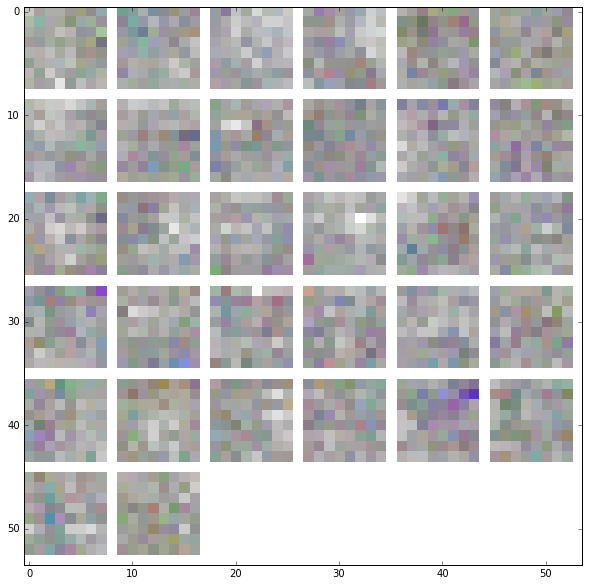

In [8]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


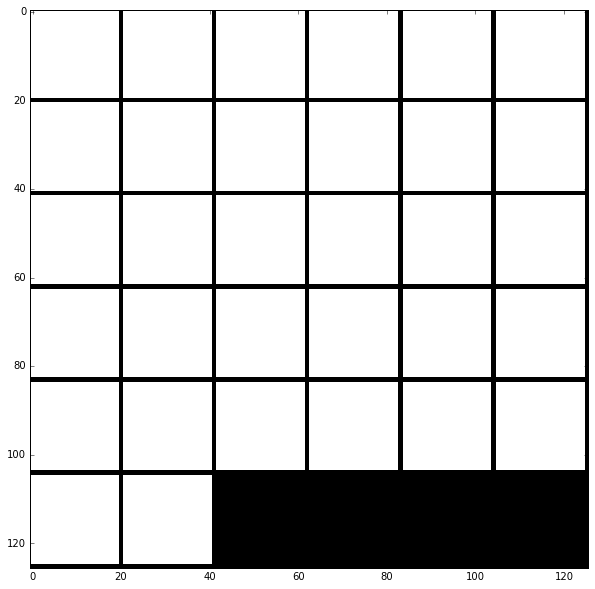

In [9]:
feat = net.blobs['conv1'].data[0, :32]
#print (feat)
vis_square(feat, padval=1)

(64, 32, 4, 4)


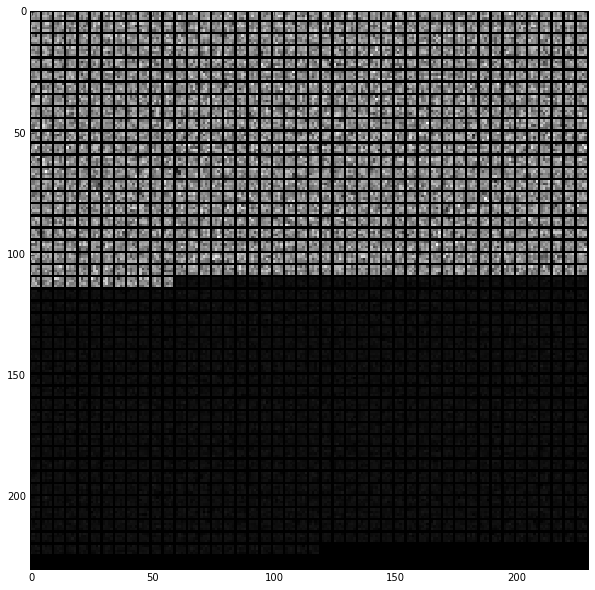

In [17]:
# the parameters are a list of [weights, biases]
#filters = net.params['conv2'][0].data
#vis_square(filters)
filters = net.params['conv2'][0].data
print (filters.shape)
vis_square(filters[:32].reshape(32*64, 4, 4))